# AMERICAN SIGN LANGUAGE CLASSIFICATION

# About the dataset


In this project, I have used the American Sign Language (ASL) data set that is provided by MNIST . This dataset contains 27455 training images and 7172 test images all with a shape of 28 x 28 pixels. These images belong to the 25 classes of English alphabet starting from A to Y (No class labels for Z because of gesture motions). This dataset is in the CSV format where training data has 27455 rows and 785 columns. The first column of the dataset represents the class label of the image and the remaining 784 columns represent the 28 x 28 pixels. The same pattern is followed by the test data set.

Source for the dataset - kaggle

# Importing important packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Loading and Preprocessing the dataset
The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST handwritten digit dataset but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.

In [2]:
train = pd.read_csv(r'C:\Users\hp\Downloads\archive\sign_mnist_train\sign_mnist_train.csv')
test = pd.read_csv(r'C:\Users\hp\Downloads\archive\sign_mnist_test\sign_mnist_test.csv')

In [3]:
print(train.shape)
print(test.shape)


(27455, 785)
(7172, 785)


In [4]:
#We will check the training data to verify class labels and columns representing pixels.
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


<AxesSubplot:ylabel='count'>

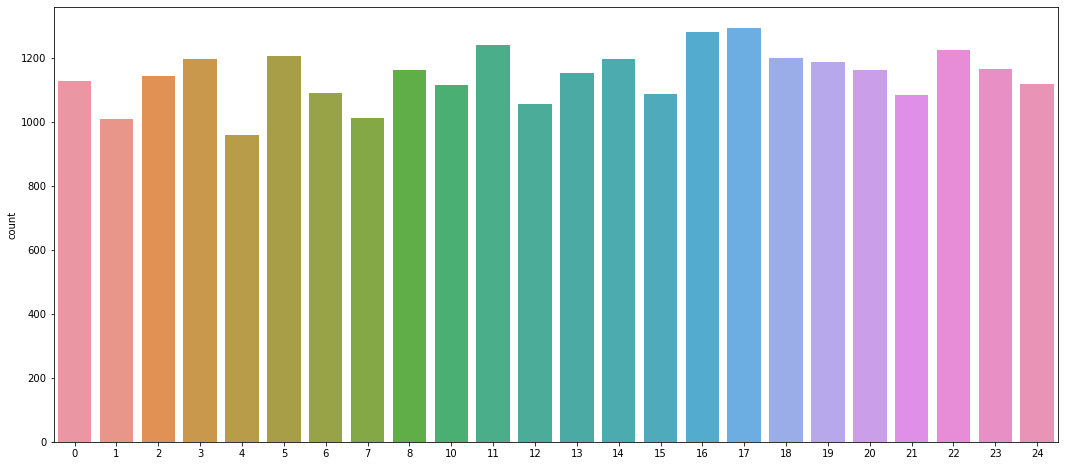

In [5]:
labels = train['label'].values


plt.figure(figsize = (18,8))
sns.countplot(x= labels)

In [6]:
# Create training and testing arrays
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [7]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

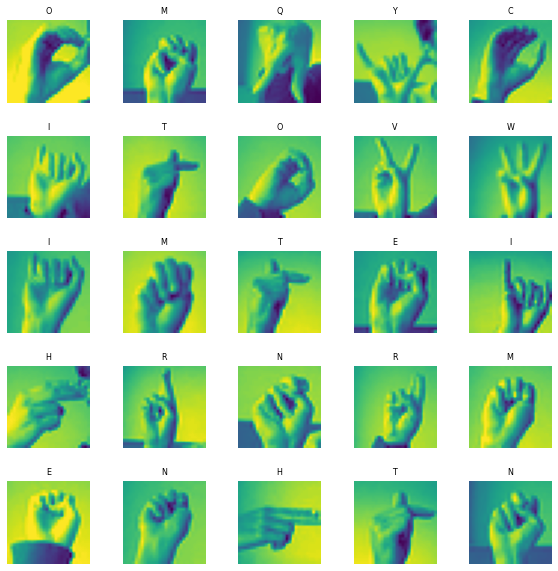

In [8]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_set) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    label_index = int(train_set[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [9]:
# Prepare the training and testing dataset 
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

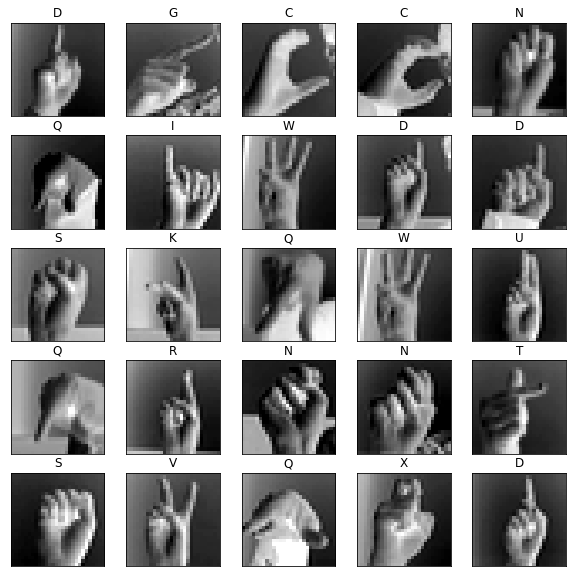

In [10]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [11]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [12]:
print(X_train.shape)
print(y_train.shape)


(21964, 784)
(21964,)


In [13]:

X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)


(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


# Building the CNN Model
The model consist of :

1.Three convolution layer each followed by MaxPooling for better feature capture
2.A dense layer of 512 units
3.The output layer with 25 units for 25 different classes

In [14]:
#Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 25, activation = 'softmax'))


In [15]:
#CNN Model Summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [16]:
#Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

#Training the CNN model
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 30, verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/30
43/43 [==============================] - 55s 573ms/step - loss: 3.1921 - accuracy: 0.0462 - val_loss: 2.9953 - val_accuracy: 0.1178
Epoch 2/30
43/43 [==============================] - 23s 540ms/step - loss: 2.7999 - accuracy: 0.1426 - val_loss: 2.0193 - val_accuracy: 0.3637
Epoch 3/30
43/43 [==============================] - 23s 544ms/step - loss: 1.9723 - accuracy: 0.3551 - val_loss: 1.2794 - val_accuracy: 0.5950
Epoch 4/30
43/43 [==============================] - 23s 542ms/step - loss: 1.4330 - accuracy: 0.5073 - val_loss: 0.9248 - val_accuracy: 0.7183
Epoch 5/30
43/43 [==============================] - 23s 540ms/step - loss: 1.1146 - accuracy: 0.6157 - val_loss: 0.7110 - val_accuracy: 0.7871
Epoch 6/30
43/43 [==============================] - 23s 541ms/step - loss: 0.8887 - accuracy: 0.6907 - val_loss: 0.5191 - val_accuracy: 0.8496
Epoch 7/30
43/43 [==============================] - 23s 541ms/step - loss: 0.7384 - accuracy: 0.7443 - val_loss: 0.4267 - val_accuracy: 0.8793

Text(0.5, 1.0, 'Accuracy evolution')

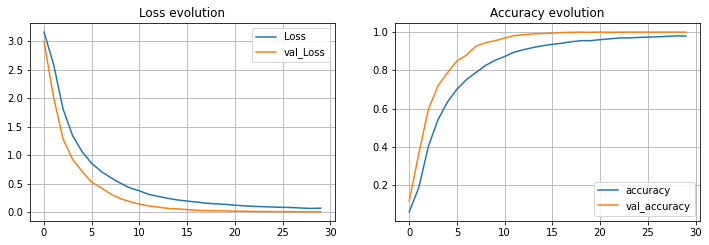

In [17]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')


In [18]:
#Predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)

C:\Users\hp\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


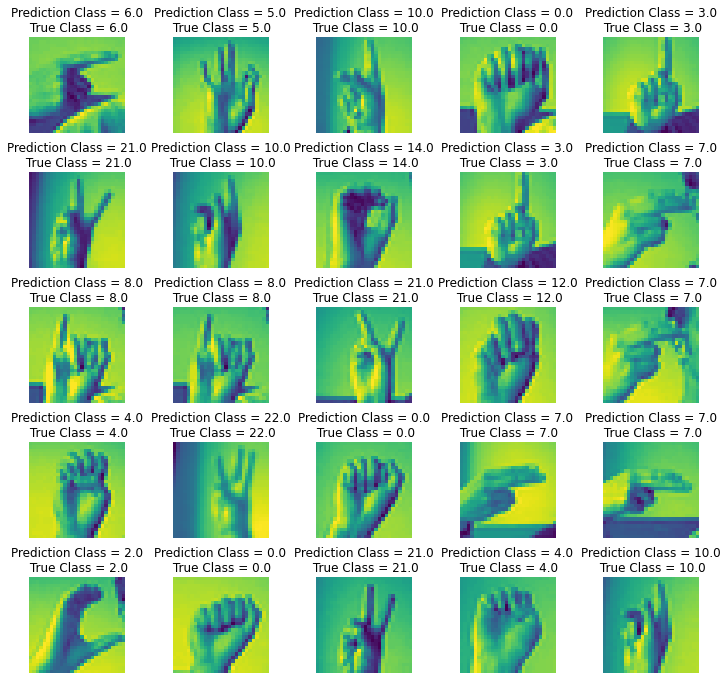

In [21]:
#Visualize predictions
L = 5
B = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * B):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [20]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ',acc_score)


Accuracy Score =  0.9549637479085332


# Here, we can conclude that the Convolutional Neural Network has performed great in the prediction of sign language symbol images.
The average accuracy score of the model is more than 94% which can further be improved .We have trained our model in 30 epochs and the accuracy may be improved if we have more epochs of training. However, more than 94% accuracy is good enough.

# FURTHER UPDATION
HERE I HAVE USED THE TESTING DATASET TO CHECK THE PREDICTIONS BUT WE CAN CHECK THIS BY GIVING THE TESTING DATA USING OPENCV IN REAL TIME AND THEN THE PROJECT CAN BE REAL-TIME